**<font size='+3' color='green'>Recurrent Neural Networks</font>**

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

##### Normalisation is recommended to be used for RNNs especially when there is a sigmoid function in the optput layer.
$$
X_{\text{norm}} = \frac{X - \min(X)}{\max(X) - \min(X)}
$$



In [3]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [5]:
print(training_set_scaled.shape)

(1258, 1)


### Creating a data structure with 60 timesteps and 1 output
- 60 timesteps means what the RNNs will remember the 60 stock prices of days before current time 't' and based on these it will try to predict the next output i.e the stock price of time 't+1'

In [6]:
X_train = []
y_train = []

# We want to append 60 previous stock prices before the stock price on day 'i'
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

In [7]:
X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train)
print()
print(y_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


### Reshaping

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [10]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


# units -> no of neurons in the given layer
# reutrn_sequences ->
# input_shape -> shape of input

# Dropout(0.2) -> Regularization; 20% of neurons of the LSTM layer will be ignored during the training i.e forward and backward propagation
# In this case 10 neurons will be dropped out

### Adding a second LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))

# return_sequences = False -> default value; since we are not returning any more sequences

### Adding the output layer

In [15]:
regressor.add(Dense(units = 1))

# Dense class to make a fully connected layer

### Compiling the RNN

In [16]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# mean_squared_error -> since we are doing regression

### Fitting the RNN to the Training set

In [17]:
regressor.fit(X_train, y_train, epochs = 130, batch_size = 30)

Epoch 1/130
40/40 [==============================] - 21s 147ms/step - loss: 0.0280
Epoch 2/130
40/40 [==============================] - 4s 107ms/step - loss: 0.0064
Epoch 3/130
40/40 [==============================] - 4s 109ms/step - loss: 0.0061
Epoch 4/130
40/40 [==============================] - 6s 144ms/step - loss: 0.0055
Epoch 5/130
40/40 [==============================] - 4s 107ms/step - loss: 0.0059
Epoch 6/130
40/40 [==============================] - 4s 111ms/step - loss: 0.0055
Epoch 7/130
40/40 [==============================] - 6s 140ms/step - loss: 0.0066
Epoch 8/130
40/40 [==============================] - 4s 106ms/step - loss: 0.0050
Epoch 9/130
40/40 [==============================] - 5s 121ms/step - loss: 0.0043
Epoch 10/130
40/40 [==============================] - 5s 132ms/step - loss: 0.0045
Epoch 11/130
40/40 [==============================] - 4s 107ms/step - loss: 0.0042
Epoch 12/130
40/40 [==============================] - 5s 128ms/step - loss: 0.0036
Epoch 13/130

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [18]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [19]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values # We need the stock prices of 60 financial days prior to Jan 3, 2017
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
# print(inputs, "\n")
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# vertical concatenation -> axis = 0
# horizontal concatenation -> axis = 1

1/1 [==============================] - 2s 2s/step


In [20]:
print(predicted_stock_price)

[[784.01904]
 [781.43207]
 [784.90643]
 [786.3666 ]
 [790.61365]
 [797.9024 ]
 [801.55914]
 [800.7028 ]
 [800.7519 ]
 [801.3785 ]
 [801.8293 ]
 [801.64813]
 [801.39624]
 [802.3499 ]
 [803.21466]
 [810.82294]
 [818.1528 ]
 [824.3557 ]
 [824.54706]
 [814.2573 ]]


### Visualising the results

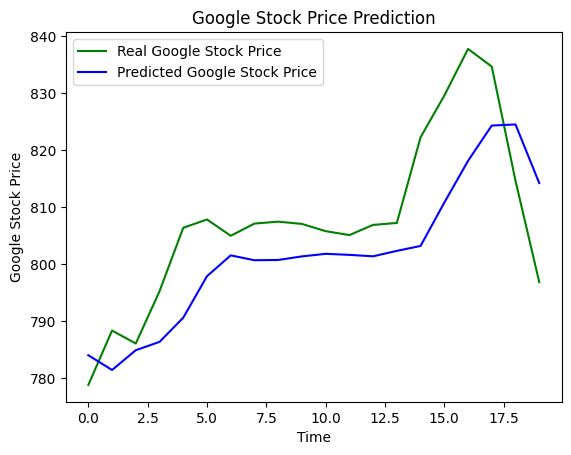

In [21]:
plt.plot(real_stock_price, color = 'green', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()